In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/amazon-fine-food-reviews/hashes.txt
/kaggle/input/amazon-fine-food-reviews/Reviews.csv
/kaggle/input/amazon-fine-food-reviews/database.sqlite


In [2]:
tdf = pd.read_csv('/kaggle/input/amazon-fine-food-reviews/Reviews.csv')
df = tdf.loc[:100000,['Summary','Text']]
df.head()

,Summary,Text
0,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,"""Delight"" says it all",This is a confection that has been around a fe...
3,Cough Medicine,If you are looking for the secret ingredient i...
4,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.drop_duplicates(subset=['Text'],inplace=True)
df.dropna(axis = 0,how = 'any',inplace=True)

In [4]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [5]:
df.shape

(88426, 2)

In [6]:
s = df["Text"][0]
print(s)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [7]:
#cleaning text data
import re
from nltk.corpus import stopwords
text = []
for i in df["Text"]:
    te = i.lower()
    te = re.sub('"','',te)
    te = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in te.split()])
    te = re.sub('[^a-zA-Z]',' ',te)
    te = [w for w in te.split(' ') if w not in set(stopwords.words('english'))]
    te = ' '.join(te)
    te = re.sub(' +',' ',te)
    te = te[:-1]
    text.append(te)
text[1201]

'despite think ton fillers see ingredient list omaha site bad thing case unhealthy fillers delicious kids love serve one ball serving perfect healthy carb portion meal piece following nutrition case wondering br br calories br br fat br br trans fat br br sodium br br carbohydrate br br protein br br dinners try keep carb side fat carb fits perfectly taste superb baked oven come crispy outside moist tender inside grease keep hand instead french fries know cost taste better much healthier wait one sales buy several boxes time'

In [8]:
#cleaning summary
summary = []
for j in df['Summary']:
    su = j.lower()
    su = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in su.split()])
    su = re.sub('[^a-zA-Z]',' ',su)
    su = su+' '
    su = re.sub(' +',' ',su)
    summary.append(su)

In [9]:
data = pd.DataFrame({'text':text,'summary':summary})

In [10]:
summary1 = []
for i in data['summary']:
    summary1.append('start_ '+i+'_end')
data['summary'] = summary1

In [11]:
for i in range(2):
    print("Review:",data['text'][i])
    print("Summary:",data['summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: start_ good quality dog food _end


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: start_ not as advertised _end




In [12]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in text:
      text_word_count.append(len(i.split()))

for i in summary:
      summary_word_count.append(len(i.split()))

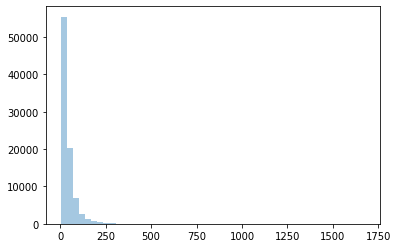

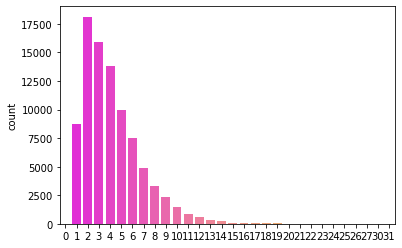

In [13]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.distplot(text_word_count, kde=False, rug=False)
plt.show()

sn.countplot(x = summary_word_count,palette ='spring')
plt.show()

In [14]:
max_len_text = 100
max_len_summary = 12

In [15]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(data['text'],data['summary'],test_size=0.1,random_state=0,shuffle=True)

In [16]:
from keras.preprocessing.text import Tokenizer
Tokens = Tokenizer()
Tokens.fit_on_texts(list(x_tr))

x_tr = Tokens.texts_to_sequences(x_tr)
x_val = Tokens.texts_to_sequences(x_val)

from keras.preprocessing.sequence import pad_sequences
x_tr = pad_sequences(x_tr,maxlen = max_len_text,padding = 'post')
x_val = pad_sequences(x_val,maxlen = max_len_text,padding = 'post')

# +1 for padding 
x_voc_size   =  len(Tokens.word_index) +1

Using TensorFlow backend.


In [17]:
from keras.preprocessing.text import Tokenizer
y_Tokens = Tokenizer()
y_Tokens.fit_on_texts(y_tr)

y_tr = y_Tokens.texts_to_sequences(y_tr)
y_val = y_Tokens.texts_to_sequences(y_val)

from keras.preprocessing.sequence import pad_sequences
y_tr = pad_sequences(y_tr,maxlen = max_len_summary,padding = 'post')
y_val = pad_sequences(y_val,maxlen = max_len_summary,padding = 'post')

y_voc_size = len(y_Tokens.word_index)+1

In [18]:
#building model
from attention import AttentionLayer
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras import backend as K 
K.clear_session() 
latent_dim = 500 
 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 
 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 
 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 100, 500)     25605000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

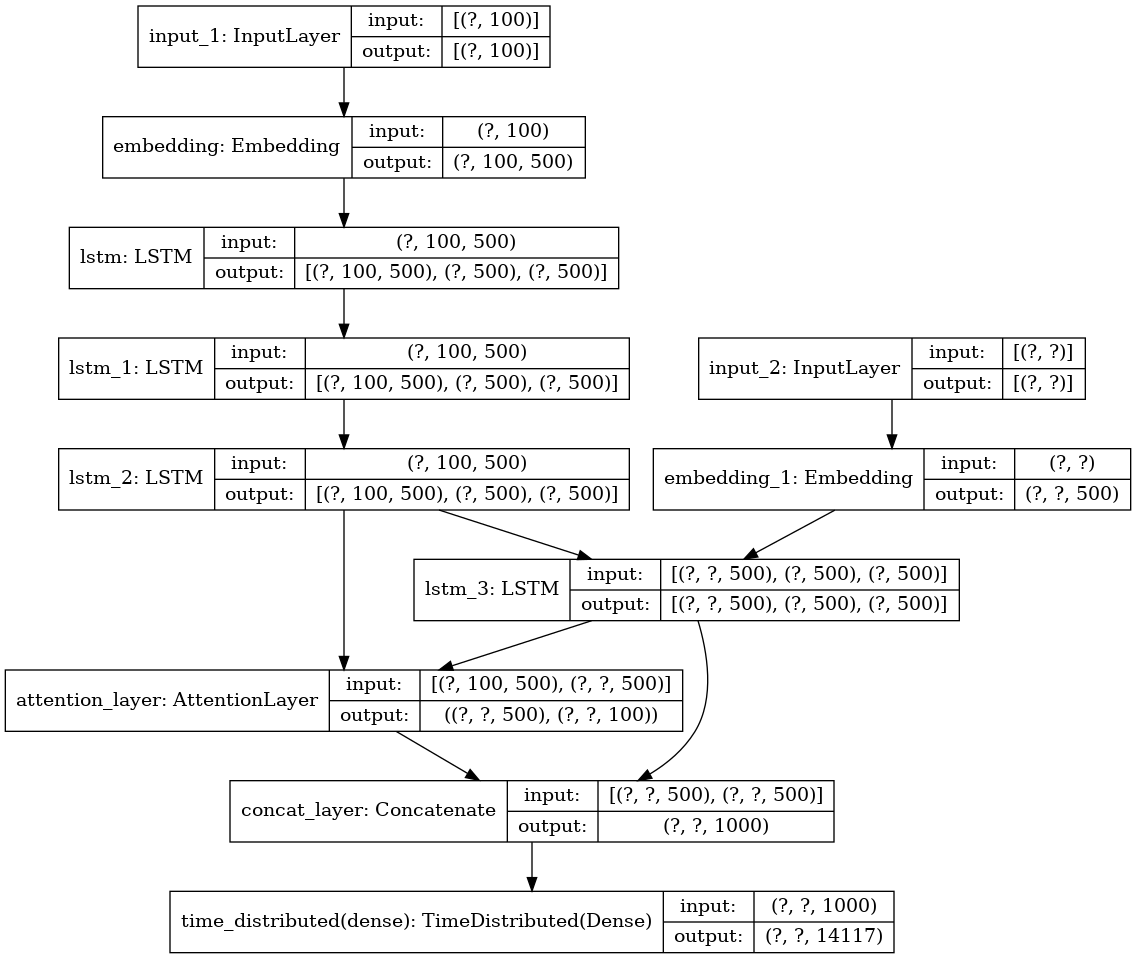

In [19]:
import tensorflow
tensorflow.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [31]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit([x_tr,y_tr[:,:-1]], y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] ,epochs=50,callbacks=[es],batch_size=512, validation_data=([x_val,y_val[:,:-1]], y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:]))

Train on 79583 samples, validate on 8843 samples
Epoch 1/50
79583/79583 [==============================] - 170s 2ms/sample - loss: 2.6011 - accuracy: 0.6348 - val_loss: 2.3151 - val_accuracy: 0.6574
Epoch 2/50
79583/79583 [==============================] - 162s 2ms/sample - loss: 2.2753 - accuracy: 0.6598 - val_loss: 2.1305 - val_accuracy: 0.6718
Epoch 3/50
79583/79583 [==============================] - 163s 2ms/sample - loss: 2.0929 - accuracy: 0.6729 - val_loss: 2.0241 - val_accuracy: 0.6810
Epoch 4/50
79583/79583 [==============================] - 163s 2ms/sample - loss: 1.9682 - accuracy: 0.6805 - val_loss: 1.9688 - val_accuracy: 0.6850
Epoch 5/50
79583/79583 [==============================] - 163s 2ms/sample - loss: 1.8680 - accuracy: 0.6869 - val_loss: 1.9304 - val_accuracy: 0.6887
Epoch 6/50
79583/79583 [==============================] - 163s 2ms/sample - loss: 1.7722 - accuracy: 0.6931 - val_loss: 1.9033 - val_accuracy: 0.6899
Epoch 7/50
79583/79583 [===========================

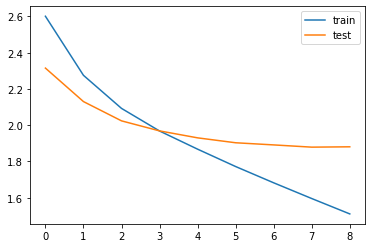

In [32]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [33]:
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

dec_emb2= dec_emb_layer(decoder_inputs)

decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

decoder_outputs2 = decoder_dense(decoder_inf_concat)

decoder_model = Model([decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],[decoder_outputs2] + [state_h2, state_c2])

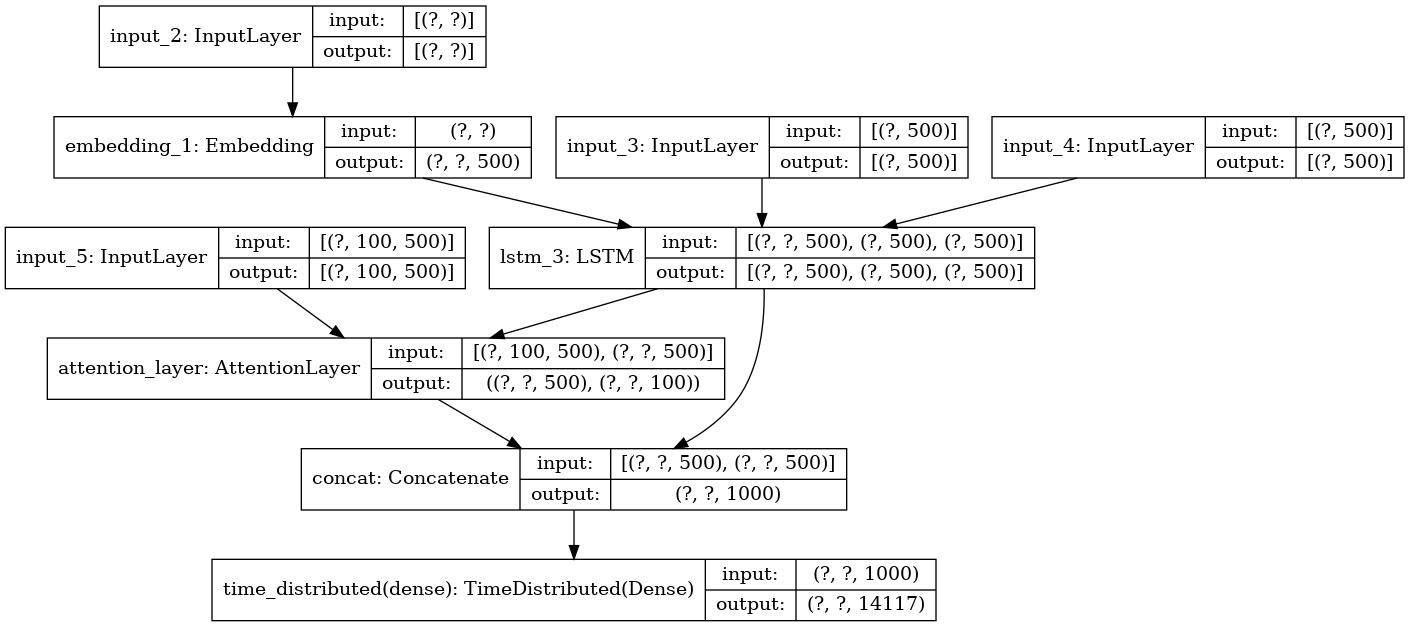

In [34]:
tensorflow.keras.utils.plot_model(decoder_model, to_file='model.png', show_shapes=True)

In [35]:
reverse_target_word_index=y_Tokens.index_word 
reverse_source_word_index=Tokens.index_word 
target_word_index=y_Tokens.word_index

In [36]:
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    target_seq = np.zeros((1,1))
    
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]

        if(sampled_token!='end'):
            decoded_sentence += ' '+sampled_token

        if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
                stop_condition = True

        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        e_h, e_c = h, c

    return decoded_sentence

In [37]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString

for i in range(10):
  print("Review:",seq2text(x_val[i]))
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,100)))
  print("\n")

Review: stuff hot use third much normally would still end hotter dish know hot fresher gotten grocery store grown different soil whatever product hot flavorful 
Original summary: caliente 
Predicted summary:  great product


Review: better cognac anywhere br trully savored dinner br experience always remember br topic conversation sure come 
Original summary: 
Predicted summary:  great product


Review: least favorite flavor find bland small bags great kids lunches nice alternative fattening chips chips great texture fried 
Original summary: love popchips 
Predicted summary:  great snack


Review: could wait taste coffee arrived immediately brewed cup smell like chocolate taste chocolate really k 
Original summary: different but delightful 
Predicted summary:  not a fan


Review: sauce spicy tasty hint smokiness flavor used dip veggies hit son friends used sandwiches raved tasty think would delicious pork chicken something buy 
Original summary: delicious 
Predicted summary:  great sau